# Random test

In [37]:
from ultralytics import YOLO
import fitz
import matplotlib.pyplot as plt
from PIL import Image
import spacy
import re
from spacy.matcher import Matcher

In [64]:
pdf = "./test/resume_1.pdf"
pdf_document = fitz.open(pdf)
model = YOLO("./best (3).pt")
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Try this one instead of online converted images

In [67]:
from pdf2image import convert_from_path
def pdf_to_image(pdf_file_path, output_image_path):
    images = convert_from_path(pdf_file_path)
    for i, image in enumerate(images):
        image.save(f"{output_image_path}_{i}.png", "PNG")
pdf_file_path = "./test/resume_1.pdf"
output_image_path = "./output_image.jpg"
pdf_to_image(pdf_file_path, output_image_path)


In [65]:
page = pdf_document.load_page(0)
zoom = 1
mat = fitz.Matrix(zoom, zoom)
pix = page.get_pixmap(matrix=mat)
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
img.save("this one quality.jpg")

In [54]:
pattern = [
    {"TEXT": {"REGEX": r"\+\d{3}"}},
    {"TEXT": {"REGEX": r"\d{8}"}}
]
matcher.add("PHONE_NUMBER", [pattern])


0: 640x480 1 Contact, 1 Education, 1 Experience, 1 Name, 2 Profils, 119.4ms
Speed: 1.7ms preprocess, 119.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
links: https://www.brocomindustry.com/,mailto:moezabdelkefi17@gmail.com,https://www.linkedin.com/in/moez-abdelkefi,https://github.com/moezabdelkefi,
PROJECTS
Final Project: NIKEZ SHOES
- Developed a full-stack e-commerce application for Nike shoes,
incorporating 3D modeling and customization features using React and
Three.js.
- Implemented user authentication, shopping cart functionality, and order
processing.
- Integrated API endpoints to retrieve product information and handle
transactions securely.
- Collaborated with teammates to ensure seamless integration of front-end
and back-end components. Utilized Firebase for real-time database
management and Sanity for content management.
Web Development Project: BROCOM, Developed and launched a WordPress website named 
"BROCOM" to facilitate the purchase of Personal P

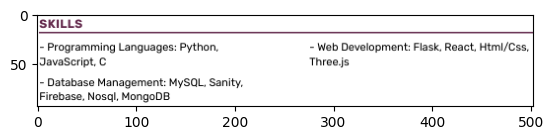

In [61]:
for page_num in range(len(pdf_document)):
    page = pdf_document.load_page(page_num)
    zoom = 1
    mat = fitz.Matrix(zoom, zoom)
    pix = page.get_pixmap(matrix=mat)
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    results = model(img)[0]
    c = 0
    labels_list = ['Achievement', 'Certifications', 'Community', 'Contact', 'Education', 'Experience', 'Interests', 'Languages', 'Name', 'Profil', 'Projects', 'image', 'resume', 'skills']
    overall_text = "links: "
    for link in page.links():
        if 'uri' in link.keys():
            overall_text += link['uri'] + ","
    overall_text += "\n"
    for i, result in enumerate(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2 = result
        label = results.boxes.cls[i]
        frame = img.crop((x1, y1, x2, y2))
        plt.imshow(frame)
        rect = fitz.Rect(x1 - 1, y1 - 1, x2 + 1, y2 + 1)
        text = page.get_textbox(rect)
        overall_text += text
        c += 1
    matches = matcher(doc)
    doc = nlp(text)
    address_entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'LOC', 'FAC']]
    print(overall_text)
    print(f"Contact Box - Phone Numbers: {matches}")
    print(f"Contact Box - Addresses: {address_entities}")


In [30]:
print(page.get_text())

SKILLS
- Programming Languages: Python, 
JavaScript, C
- Database Management: MySQL, Sanity, 
Firebase, Nosql, MongoDB
- Web Development: Flask, React, Html/Css, 
Three.js
EDUCATION
Holberton School
09/2022 – 05/2024  | tunis, Tunisia
Current student pursuing a
Master's degree in Computer
Science or Software Engineering
from holberton school university
LANGUAGES
English
moez abdelkefi
moezabdelkefi17@gmail.com



In [20]:
import matplotlib.pyplot as plt

In [28]:
pdf_path = f"./test/resume_1.pdf"
pdf_document = fitz.open(pdf_path)
page = pdf_document.load_page(0)
rect = fitz.Rect(77.98146057128906, 999.7266845703125, 336.85247802734375, 1482.857177734375)
pic = page.get_pixmap(mat=(1, 1))
print(pic.height)
img = Image.frombytes("RGB", [pic.width, pic.height], pic.samples)
img.show()
pymupdf_text += page.get_textbox(rect)
print(f"with this{pymupdf_text}")

843
with this


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpvbzwibdq.PNG'


In [30]:
print([pix.width, pix.height])

[596, 843]


# Testing the OCR

In [12]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract
import numpy as np

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0
for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    image = cv2.imread(image_path)
    page = pdf_document.load_page(0)
    zoom = 1
    mat = fitz.Matrix(zoom, zoom)
    pix = page.get_pixmap(matrix=mat)
    img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)
    img = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    results = model(image)[0]
    results_1 = model(img)[0]
    processed_results = []
    seen_regions = set()
    processed_results_1 = []
    seen_regions_1 = set()
    for result1 in sorted(results_1.boxes.xyxy.tolist()):
        x1, y1, x2, y2= result1
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions_1.add(region_key)
            processed_results_1.append(result1)
    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2= result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        noise_canceling = cv2.GaussianBlur(cropped_region, (3, 3), 1)
        extracted_text = pytesseract.image_to_string(noise_canceling)
        code_text += extracted_text
    for result1 in processed_results_1:
        x11, y11, x21, y21 = result1
        rect = fitz.Rect(x11, y11, x21, y21)
        pymupdf_text += page.get_textbox(rect)
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 20
print(similarity_overall)


0: 640x480 1 Contact, 1 Education, 1 Experience, 1 Languages, 1 Name, 2 Profils, 1 skills, 125.3ms
Speed: 3.3ms preprocess, 125.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Contact, 1 Education, 1 Experience, 1 Languages, 1 Name, 2 Profils, 1 skills, 115.3ms
Speed: 2.1ms preprocess, 115.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Certifications, 1 Community, 2 Educations, 1 Experience, 1 Languages, 1 Name, 1 Profil, 131.6ms
Speed: 1.7ms preprocess, 131.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Certifications, 1 Community, 1 Contact, 2 Educations, 2 Experiences, 1 Languages, 1 Name, 1 Profil, 1 skills, 156.7ms
Speed: 2.0ms preprocess, 156.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Contact, 1 Education, 1 Experience, 2 Names, 2 Profils, 117.4ms
Speed: 2.2ms preprocess, 117.4ms inference, 0.6ms postprocess per image at shape (1, 3, 

In [ ]:
rect = fitz.Rect(x1 - 1, y1 - 1, x2 + 1, y2 + 1)
pymupdf_text += page.get_textbox(rect)